# 多元线性回归(multivariate linear regression)

In [1]:
from csv import reader
import numpy as np

train_file=open("covid.train.csv")
rdr=reader(train_file)
a=[]
tar=[]
fst=True
for row in rdr:
    if fst:
        fst=False
    else:
        a.append(list(map(float,[1]+row[1:-1])))
        tar.append(float(row[-1]))
train_file.close()
x=np.array(a)
y=np.array(tar)
print(x.shape)
print(y.shape)

(2700, 94)
(2700,)


In [2]:
def normalize(x):
    nx=np.empty([x.shape[0],x.shape[1]],dtype=float)
    for j in range(1,x.shape[1]):
        now_mean=x[:,j].mean()
        now_dlt=x[:,j].max()-x[:,j].min()
        for i in range(x.shape[0]):
            nx[i][j]=(x[i][j]-now_mean)/now_dlt
    for i in range(x.shape[0]):
        nx[i][0]=1
    return nx
x=normalize(x)
print(x)

[[ 1.          0.97518519 -0.02481481 ... -0.16979948 -0.36785771
  -0.03808142]
 [ 1.          0.97518519 -0.02481481 ... -0.18283663 -0.36127691
  -0.07514595]
 [ 1.          0.97518519 -0.02481481 ... -0.19845081 -0.379884
  -0.06303479]
 ...
 [ 1.         -0.02481481 -0.02481481 ... -0.03613014  0.0982804
  -0.23016801]
 [ 1.         -0.02481481 -0.02481481 ... -0.00725558  0.10044959
  -0.23591554]
 [ 1.         -0.02481481 -0.02481481 ...  0.0035114   0.11703896
  -0.24149639]]


$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
$$

$$
h_\theta(x)=\theta^Tx
$$

In [3]:
def J(theta):
    m=x.shape[0]
    res=0
    for i in range(m):
        tmp=theta.dot(x[i])-y[i]
        res+=tmp*tmp
    return res/(2*m)
n=x.shape[1]
theta=np.empty([n],dtype=float)
J(theta)

164.0100033239165

Gradient Descent Algorithm

Repeat{

${\theta}_j={\theta}_j-\alpha\frac{\partial }{\partial \theta_j}J(\theta)$

(simultaneously uptade $\theta_j$ for $j = 0,\dots,n$)

}

For now,
$$
\frac{\partial }{\partial \theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j
$$



In [4]:
from matplotlib import pyplot as plt
def GradientDescent(theta,x,T=1000000,alpha=0.06,eps=1e-9):
    n=x.shape[1]
    pre_error=J(theta)
    nxt=np.empty([n],dtype=float)
    m=x.shape[0]
    err=[]
    while T>0:
        # for j in range(n):
        #     sum=0.0
        #     for i in range(m):
        #         sum+=(theta.dot(x[i])-y[i])*x[i][j]
        #     # print(sum)
        #     nxt[j]=theta[j]-alpha*sum/m
        nxt=theta-((x.dot(theta)-y).dot(x)*(alpha/m))
        now_error=J(nxt)
        # print(theta)
        # print(nxt)
        err.append(now_error)
        # print(now_error,pre_error-now_error,sep=" ")
        if(abs(pre_error-now_error)<eps):
            break
        pre_error=now_error
        theta=nxt
        T-=1
    plt.plot(np.arange(1,len(err)+1),err)
    return theta

0.4110994620838109


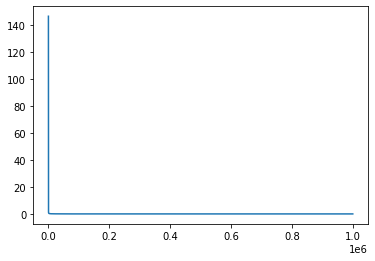

In [5]:
theta=GradientDescent(theta,x)
print(J(theta))

In [6]:
file=open("theta.txt","w")
file.write(str(theta))
file.close()

In [7]:
test_file=open("covid.test.csv")
rdrt=reader(test_file)
b=[]
fst=True
for row in rdrt:
    if fst:
        fst=False
    else:
        b.append(list(map(float,[1]+row[1:])))
test_file.close()
tx=np.array(b)
tx=normalize(tx)
print(tx.shape)

(893, 94)


In [8]:
from csv import writer
outfile=open("result2.csv","w")
wtr=writer(outfile,lineterminator='\n')
header=["id","tested_positive"]
wtr.writerow(header)
for i in range(tx.shape[0]):
    wtr.writerow([i,theta.dot(tx[i])])
outfile.close()